In [1]:
import argparse
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  #  You may --  pip install wordcloud
from PIL import Image


In [2]:
df_Linkedin = pd.DataFrame(pd.read_excel("~/4502/project/data/Linkedin_Data.xlsx"))
df_Linkedin.head()

,Post,Location,Description,Function,Salary
0,Full Time Opportunities for Students and Recen...,"Aliso Viejo, CA",Software engineers at Microsoft are passionate...,EducationTraining,NaN
1,"Applications Programmer, Junior","El Segundo, CA","Job Title Applications Programmer, Junior Re...",DesignInformation TechnologyEngineering,NaN
2,Gameplay Programming Intern,"Los Angeles, CA",PlayStation isn just the Best Place to Play t ...,EducationTraining,NaN
3,Gameplay Programmer,"Irvine, CA",Obsidian is looking for experienced gameplay p...,EngineeringInformation Technology,NaN
4,Junior Gameplay Engineer,"Dublin, CA",Education Bachelor's degree Skills C++ Sanzar...,EngineeringInformation Technology,NaN


In [3]:
df_handshake = pd.read_csv('~/4502/project/data/Handshake_Data.csv')
df_handshake.head()

,Role Name,Location,Role Description,Job Type,Estimated Salary,Employee Size
0,Computer Science Instructor,"Camarillo, California, United States",Computer Science InstructorVentura County Comm...,Full-Time,Not Specified,100 - 250
1,Patent Engineer -Computer Science,"Evanston, Illinois, United States of America",Patent Analysts investigate the latest innovat...,Full-Time,Not Specified,Not Specified
2,"Assistant Professor, Computer Science","Colorado Springs, Colorado, United States","Assistant Professor, Computer ScienceDepartmen...",Full-Time,Not Specified,"1,000 - 5,000"
3,Computer Science Intern Program (CSIP),"Fort George G. Meade, Maryland, United States",ResponsibilitiesThe Computer Science Intern Pr...,Part-Time,Not Specified,Not Specified
4,"Computer Science, Assistant Professor R19158","Bellevue, Washington, United States of America","Computer Science, Assistant Professor R19158Sa...",Full-Time,Not Specified,"5,000 - 10,000"


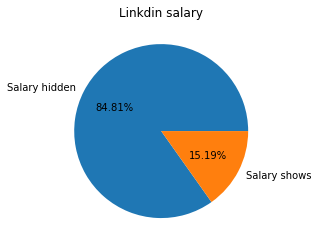

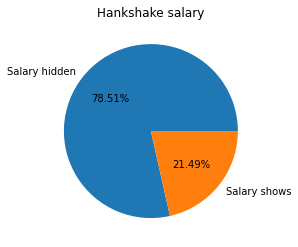

In [4]:
df_handshake_salary = df_handshake.copy()
df_Linked_salary = df_Linkedin.copy()

freq_hs = {}
freq_li = {}

for item in df_handshake_salary['Estimated Salary']: 
    if (item in freq_hs): 
        freq_hs[item] += 1
    else: 
        freq_hs[item] = 1

for item in df_Linked_salary['Salary']: 
    if (item in freq_li): 
        freq_li[item] += 1
    else: 
        freq_li[item] = 1
                
keys_hs = [i for i in freq_hs.keys()]
keys_li = [i for i in freq_li.keys()]

nan_hs = freq_hs[keys_hs[0]]
tot_hs = len(df_handshake_salary['Estimated Salary'])
number_hs = [nan_hs, tot_hs - nan_hs]

nan_li = freq_li[keys_li[0]]
tot_li = len(df_Linked_salary['Salary'])
number_li = [nan_li, tot_li - nan_li]

label_name = ["Salary hidden","Salary shows"]
plt.figure(0)
plt.pie(number_hs, labels = label_name, autopct='%1.2f%%') 
plt.title('Linkdin salary')
plt.figure(1)
plt.pie(number_li, labels = label_name, autopct='%1.2f%%')
plt.title('Hankshake salary')
plt.show()

In [5]:
df_handshake_concat = df_handshake.rename(columns={'Role Name': 'Post', 'Role Description': 'Description'})
df_handshake_concat = df_handshake_concat.drop(['Job Type', 'Estimated Salary', 'Employee Size'], axis=1)
df_handshake_concat.head()

,Post,Location,Description
0,Computer Science Instructor,"Camarillo, California, United States",Computer Science InstructorVentura County Comm...
1,Patent Engineer -Computer Science,"Evanston, Illinois, United States of America",Patent Analysts investigate the latest innovat...
2,"Assistant Professor, Computer Science","Colorado Springs, Colorado, United States","Assistant Professor, Computer ScienceDepartmen..."
3,Computer Science Intern Program (CSIP),"Fort George G. Meade, Maryland, United States",ResponsibilitiesThe Computer Science Intern Pr...
4,"Computer Science, Assistant Professor R19158","Bellevue, Washington, United States of America","Computer Science, Assistant Professor R19158Sa..."


In [6]:
short_state_names = {
        'AK': 'Alaska',    'AL': 'Alabama',    'AR': 'Arkansas',    'AS': 'American Samoa',    'AZ': 'Arizona',
        'CA': 'California',    'CO': 'Colorado',    'CT': 'Connecticut',    'SanFranciscoBayArea': 'California',
        'DC': 'District of Columbia',    'DE': 'Delaware',    'FL': 'Florida',
        'GA': 'Georgia',    'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',    'ID': 'Idaho',    'IL': 'Illinois',    'IN': 'Indiana',
        'KS': 'Kansas',    'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',    'MD': 'Maryland',
        'ME': 'Maine',    'MI': 'Michigan',    'MN': 'Minnesota',    'MO': 'Missouri',    'MP': 'Northern Mariana Islands',    'MS': 'Mississippi',    'MT': 'Montana',
        'NA': 'National',    'NC': 'North Carolina',    'ND': 'North Dakota',    'NE': 'Nebraska',    'NH': 'New Hampshire',    'NJ': 'New Jersey',    'NM': 'New Mexico',    'NV': 'Nevada',    'NY': 'New York', 'NewYorkCityMetropolitanArea': 'New York',
        'OH': 'Ohio',    'OK': 'Oklahoma',    'OR': 'Oregon',
        'PA': 'Pennsylvania',    'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',    'SD': 'South Dakota',    
        'TN': 'Tennessee',    'TX': 'Texas',    'TexasMetropolitanArea': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',    'VI': 'Virgin Islands',    'VT': 'Vermont',
        'WA': 'Washington',    'WI': 'Wisconsin',    'WV': 'West Virginia',    'WY': 'Wyoming'
}

In [7]:
###################    Location Replacing    ######################################

global df_Linkedin

df_Linedin_concat = df_Linkedin.drop(['Function', 'Salary'], axis=1)

corrected_location_name = []
for i in df_Linedin_concat['Location']:
    
    str_ls = i.replace(" ", "").split(',')
    initial_str = str_ls[0] + ', ' + str_ls[-1]
    
    if str_ls[-1] in short_state_names.keys():
        str_ls[-1] = short_state_names[str_ls[-1]]
        out_str = str_ls[0] + ', ' + str_ls[-1]
        corrected_location_name.append(out_str + ', United States')
    else:
        corrected_location_name.append(initial_str)
    
df_Linedin_concat.Location = corrected_location_name
df_Linedin_concat.head()

,Post,Location,Description
0,Full Time Opportunities for Students and Recen...,"AlisoViejo, California, United States",Software engineers at Microsoft are passionate...
1,"Applications Programmer, Junior","ElSegundo, California, United States","Job Title Applications Programmer, Junior Re..."
2,Gameplay Programming Intern,"LosAngeles, California, United States",PlayStation isn just the Best Place to Play t ...
3,Gameplay Programmer,"Irvine, California, United States",Obsidian is looking for experienced gameplay p...
4,Junior Gameplay Engineer,"Dublin, California, United States",Education Bachelor's degree Skills C++ Sanzar...


In [8]:
#####################  Link 2 raw data spreadsheet Together   ##############################

whole_df = pd.concat([df_Linedin_concat, df_handshake_concat], ignore_index=True)

len(whole_df)
#####################  Link 2 raw data spreadsheet Together   ##############################

7211

In [9]:
##############################    Location Name Standardize    ###############################

global whole_df

merge_df = whole_df.copy()
for idx, ctn in enumerate(merge_df['Location']):
    temp = ctn.replace(" ", "").split(',')[-1]
    if temp == 'UnitedStatesofAmerica' or temp == "USA":
        merge_df.at[idx, 'Location'] = (ctn + ', UnitedStates')

In [10]:
global merge_df

unclean_loc_df = merge_df.copy()
raw_location = [i for i in unclean_loc_df['Location']]
    
#   Get all countries' name
def get_countries(country_list):
    ctry_ls = []
    for i in range(len(country_list)):
        new_data = country_list[i].replace(" ", "").split(',')
        country = new_data[-1]
        ctry_ls.append(country)
    
    country_freq = {}
    for item in ctry_ls: 
        if item in country_freq: 
            country_freq[item] += 1
        else: 
            country_freq[item] = 1
    
    return country_freq

country_freq = get_countries(raw_location)
    
sort_freq = sorted(country_freq.items(), key=lambda x: x[1], reverse=True)
print("Raw Locations List:\n\n", sort_freq)

Raw Locations List:

 [('UnitedStates', 7073), ('Singapore', 33), ('Japan', 30), ("People'sRepublicofChina", 20), ('Philippines', 10), ('Taiwan', 8), ('Canada', 7), ('Indonesia', 5), ('Thailand', 5), ('Switzerland', 3), ('Malaysia', 3), ('Vietnam', 3), ('UnitedKingdom', 2), ('Zambia', 2), ('China', 1), ('Ireland', 1), ('Nepal', 1), ('AmericanSamoa', 1), ('Sweden', 1), ('HongKong', 1), ('India', 1)]


In [11]:
#################################    Cleaning Unrelated Locations    ############################################

global merge_df

target_country = 'UnitedStates'
cleaned_loc_df = merge_df.copy()

drop_idx = []
for i in range(len(cleaned_loc_df['Location'])):
    temp = cleaned_loc_df['Location'][i].replace(" ", "").split(',')
    if temp[-1] not in target_country:
        drop_idx.append(i)
cleaned_loc_df = cleaned_loc_df.drop(drop_idx)

cleaned_location = [i for i in cleaned_loc_df['Location']]
cleaned_freq = get_countries(cleaned_location)
print("Cleaned Locations List:\n\n", cleaned_freq)


Cleaned Locations List:

 {'UnitedStates': 7073}


In [12]:
##############################    Save Cleaned Data into CSV    ############################

global cleaned_loc_df

#  You can change to your own dir path below....
cleaned_loc_df.to_csv(r'~/4502/project/data/Full_data.csv', index=False)


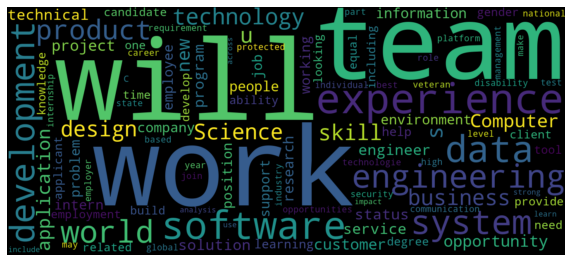

In [13]:
########################    WordCloud Visulization for Special Words in " Description "    ################################

global cleaned_loc_df

text = " ".join(review for review in cleaned_loc_df['Description'])

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False, width=900, height=400, background_color='black', max_words=100, scale=1.5).generate(text)

# Display the generated image:
fig = plt.figure(figsize =(10, 7)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('description.png')
plt.show()

In [14]:
########################    WordCloud Visulization for Special Words in " Location "    ################################

global cleaned_loc_df

state_ls = [i for i in cleaned_loc_df['Location']]
state = []
state_freq = {}

def get_all_states(loc_ls):
    state = []
    for i in range(len(loc_ls)):
        split_dat = loc_ls[i].replace(" ", "").split(',')
        if len(split_dat) == 3:
            state.append(split_dat[1])
        if len(split_dat) == 2:
            state.append(split_dat[0])
            
    state_freq = {}
    for item in state: 
        if item in state_freq: 
            state_freq[item] += 1
        else: 
            state_freq[item] = 1
    return state, state_freq
            
state, state_freq = get_all_states(state_ls)
sort_state_freq = sorted(state_freq.items(), key=lambda x: x[1], reverse=True)
print("Full States Counts List:\n\n", sort_state_freq)

Full States Counts List:

 [('California', 1406), ('Texas', 1125), ('NewYork', 1102), ('Florida', 995), ('Colorado', 164), ('NorthCarolina', 124), ('Massachusetts', 89), ('Georgia', 83), ('Maryland', 81), ('Pennsylvania', 75), ('Illinois', 68), ('Virginia', 61), ('Wisconsin', 51), ('Nebraska', 47), ('DistrictofColumbia', 42), ('Ohio', 40), ('Washington', 38), ('NewMexico', 36), ('Michigan', 33), ('Utah', 30), ('Tennessee', 27), ('Minnesota', 26), ('NewJersey', 25), ('Kansas', 23), ('Missouri', 19), ('Arizona', 19), ('Iowa', 16), ('Oregon', 14), ('Connecticut', 11), ('Delaware', 8), ('Indiana', 8), ('SouthDakota', 8), ('Louisiana', 7), ('Idaho', 5), ('Oklahoma', 5), ('RhodeIsland', 5), ('Kentucky', 5), ('Alabama', 4), ('Nevada', 4), ('Arkansas', 4), ('Vermont', 3), ('Montana', 3), ('WestVirginia', 2), ('Maine', 1), ('Mississippi', 1), ('Alaska', 1), ('NorthDakota', 1), ('Wyoming', 1)]


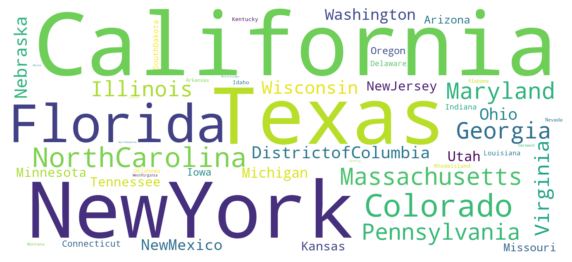

In [15]:

global state, sort_state_freq

text = " ".join(review for review in state)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False, width=900, height=400, background_color='white', max_words=100, scale=1.5).generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('state.png')
plt.show()


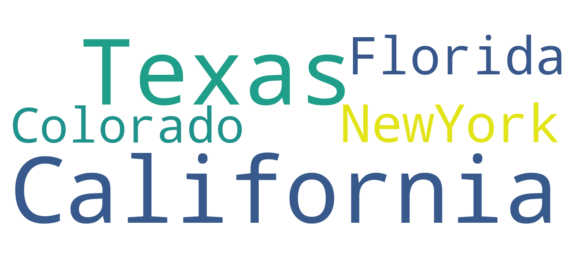

In [16]:

global sort_state_freq

tmp_ls = sort_state_freq[:5]
top_state = [i[0] for i in tmp_ls]

text = " ".join(review for review in top_state)

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False, width=900, height=400, background_color='white', max_words=100, scale=1.5).generate(text)

# Display the generated image:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('top_state.png')
plt.show()


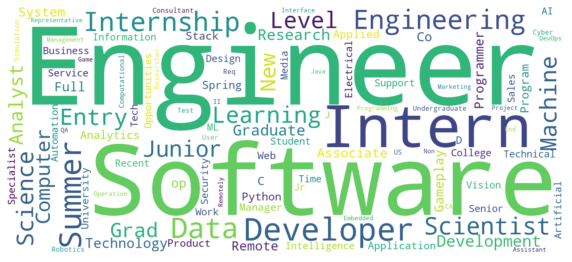

In [17]:
########################    WordCloud Visulization for Special Words in " Role Name "    ################################

global cleaned_loc_df

text = " ".join(review for review in cleaned_loc_df['Post'])

# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False, width=900, height=400, background_color='white', max_words=100, scale=1.5).generate(text)

# Display the generated image:
fig = plt.figure(figsize =(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Role.png')
plt.show()

In [18]:
##############################    Get Skills Process    #######################################

global cleaned_loc_df

skill_df = cleaned_loc_df.copy()
skill_df = skill_df.drop(['Post', 'Location'], axis=1)
skill_df.head()

,Description
0,Software engineers at Microsoft are passionate...
1,"Job Title Applications Programmer, Junior Re..."
2,PlayStation isn just the Best Place to Play t ...
3,Obsidian is looking for experienced gameplay p...
4,Education Bachelor's degree Skills C++ Sanzar...


In [19]:
################################    Skills List Extract from tiobe index    ################################
'''  https://www.tiobe.com/tiobe-index/   '''

skills_list = [
       'C', 'C++',' C#', 'Visual Basic', 'Objective-C',
       '.NET', 'Python', 'Assembly language',
       'SQL', 'PHP', 'HTML', 
       'CSS', 'Bootstrap', 'Swift', 
       'Lua', 'MATLAB', 'jQuery', 'Perl',
       'Git', 'Groovy', 'Java', 'JavaScript', 
       'R', 'Ruby', 'Scala',  'Go', 'NodeJS', 'React', 
       'Angular', 'Vue', 'Flask', 'Jinja', 'Django', 
       'MongoDB', 'Redis', 'Nginx', 'Cassandra', 
       'Hadoop', 'Express', 'Spark', 'REST', 'JSON', 
       'XML', 'Socket', 'Webpack', 'HTTPS', 'Spring MVC', 
       'Spring boot', 'Hibernat', 'Data structures', 
       'Algorithms', 'Multi-thread', 'PyTorch', 'TensorFlow', 'TCP/IP'
]

In [137]:
###############################    Sample Sentence Analysis    ################################
skill_df['Description'][5010]

"ERPi is proud to support the Joint Artificial Intelligence Center (JAIC)'s Support Services program. This program is enabling JAIC to lead the management and implementation of AI across DoD.In support of this effort, ERPi is searching for an experienced Data Engineer. The Data Engineer will:Support the configuration and ingestion of designated structured, unstructured, and semi-structured data repositories into capabilities that satisfy mission partner requirements and support a data analytics/DevOps pipeline to drive rapid delivery of functionality to the clientMaintain all operational aspects of data transfers while accounting for the security posture of the underlying infrastructure and the systems and applications that are supported; monitoring the health of the environment through a variety of health tracking capabilitiesAutomate configuration management, leverage tools, and stay current on data extract, transfer, and load (ETL) technologies and servicesWork under general guidanc

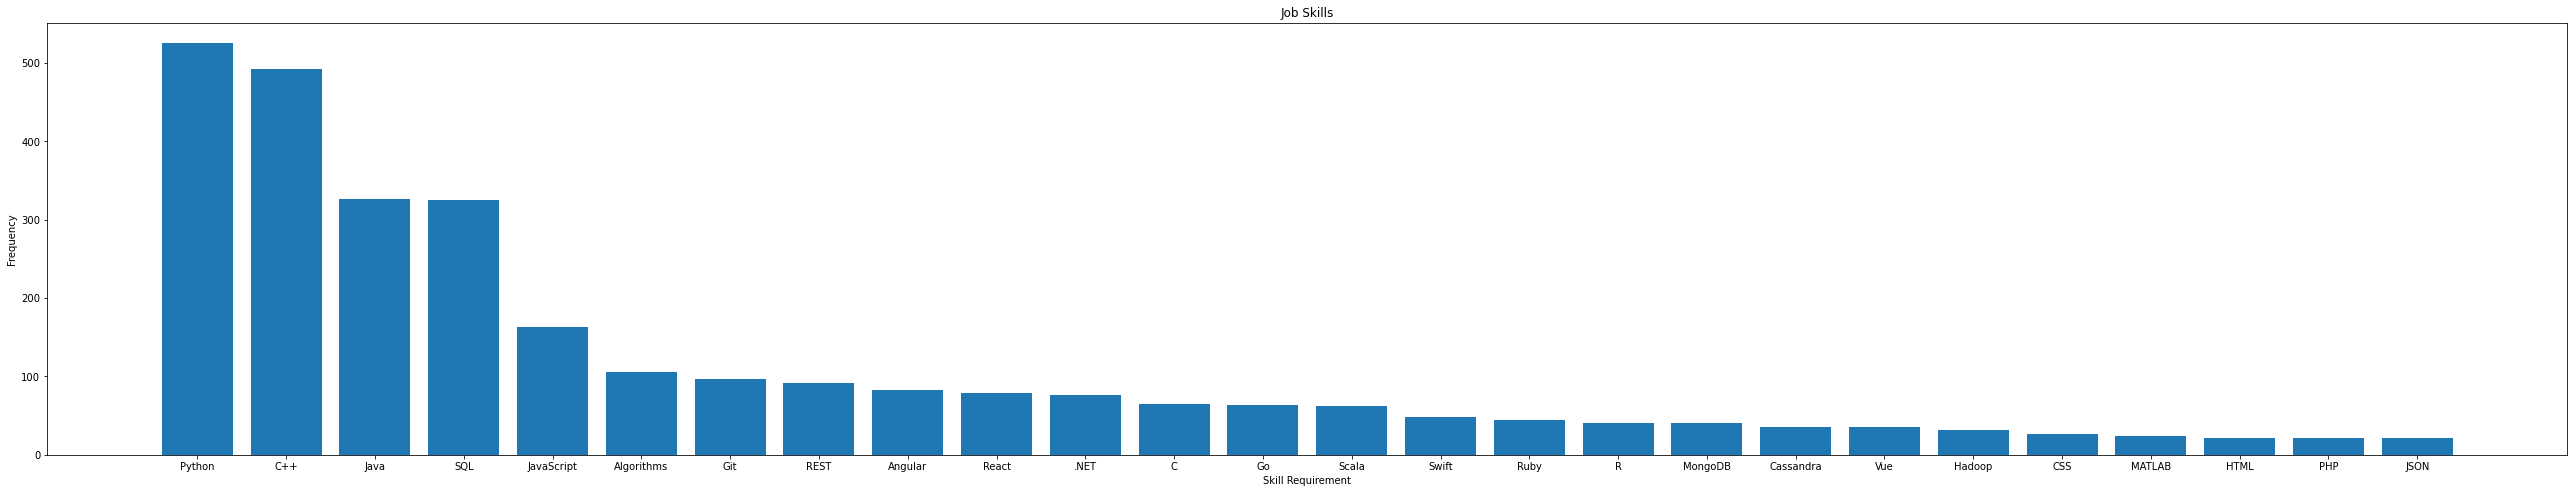

In [21]:
##################################    Skills Ranking    ########################################

df_skill = pd.DataFrame(pd.read_excel("~/4502/project/data/skills_list.xlsx"))
fig = plt.figure(figsize=(35,6))
ax = fig.add_axes([1,1,1,1])
skill = df_skill['Skill']
frequency = df_skill['Freq']
drop_num=[]
tot_other = 0
for i in range(len(frequency)):
    if frequency[i]<= 20:
        drop_num.append(i)
        tot_other +=frequency[i] 
new_frequency = frequency.drop(drop_num)
new_skill = skill.drop(drop_num)
ax.bar(new_skill,new_frequency)
plt.ylabel('Frequency')
plt.xlabel('Skill Requirement')
plt.title("Job Skills")
plt.show()

a) [30457.82127594     0.             0.        ]
3.0135109424591064


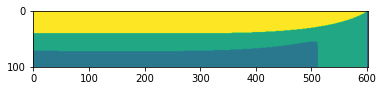

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
import seaborn as sns
import random
import time
start = time.time()
# Variables
f = np.array([500, 300, 200])
C = 100
T = 600
mu = np.array([0.001, 0.015, 0.05])
nu = np.array([0.01, 0.005, 0.0025])

# _lambda[i][t] = mu[i] * exp(nu[i] * t)

# C is row, T is column
V = np.empty((C+1, T+2, 3))
P = np.empty((C+1, T+2))

# x = 0
V[0, :] = 0
V[:, T+1] = 0
P[0, :] = 0
P[:, T+1] = 0
# x > 0
# Vt(x) = max(sum(_lambda[a][t] * (f[a] + Vt+1(x-1))) + (1 - sum(_lambda[a][t])) * Vt+1(x))
# We assume t starts from 1 not 0 (according to example in lecture)
for t in range(T, -1, -1):
    for i in range(1, C+1):
        _max = 0
        # a is action
        for a in range(0, 3):
            willing = 0
            # not_willing = 1
            for j in range(a+1):
                _lambda = mu[j] * exp(nu[j] * (t))
                willing += _lambda
                # not_willing -= _lambda
            for k in range(3):
                expected = (
                    (willing * (f[a] + V[i-1][t+1][k])) + ((1 - willing) * V[i][t+1][k]))
                if(expected > _max):
                    _max = expected
                    V[i][t][k] = _max
                    P[i][t] = f[a]
                    continue
# print(V)
# print(P)
print(f"a) {V[C][1]}")
print(time.time()-start)
# Value should be 30457.82
# d) 30329
# y is capacity, x is time, color is class
plt.figure(0)
plt.imshow(P)
plt.savefig('policy.png', dpi=300)

# price = np.zeros((T+1))
# demand = np.empty((T+1))
# rewards = np.array([])
# remaining_C = 100
# capacity = np.empty((T+1))
# weights = np.empty(4)
# f = np.append(f, 0)
# # for simulation in range(10):
# for t in range(0, T+1):
#     for j in range(3):
#         _lambda = (mu[j] * exp(nu[j] * t))
#         weights[j] = float(_lambda)
#     weights[3] = 1- np.sum(weights[0:3])
#     demand[t] = np.random.choice(f, p=weights)
#     if (P[remaining_C][t] <= demand[t]):
#         remaining_C -= 1
#         price[t] =P[remaining_C][t]
#     else:
#         price[t] =P[remaining_C][t+1]
#     capacity[t] = remaining_C

# price[T]
# # plt.figure(1)
# # plt.plot(demand, 'bo',)
# # plt.xticks(range(0, T+1, 50))
# # plt.savefig('plot.png', dpi=300)
# # plt.figure(2)
# # plt.plot(price, 'ro', alpha=0.5)
# # plt.savefig('plot2.png', dpi=300)
# # # TODO: Seperate plots
# # plt.figure(3)
# # plt.plot(capacity)
# # plt.savefig('plot3.png', dpi=300)
